In [1]:
import os
os.chdir('..')

In [5]:
from pathlib import Path
import json
import yaml
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
from src.datamodules.cifar_datamodule import CIFAR10DataModule

In [3]:
def visualize_augmentations(image, transform, samples=10, cols=5):
    transform = A.Compose([t for t in transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 6))
    for i in range(samples):
        auged_image = transform(image=image)['image']
        ax.ravel()[i].imshow(auged_image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show()

In [7]:
dm = CIFAR10DataModule(data_dir='/home/cyanos/Workspace/pytorch_datasets')
dm.setup()

### Scale

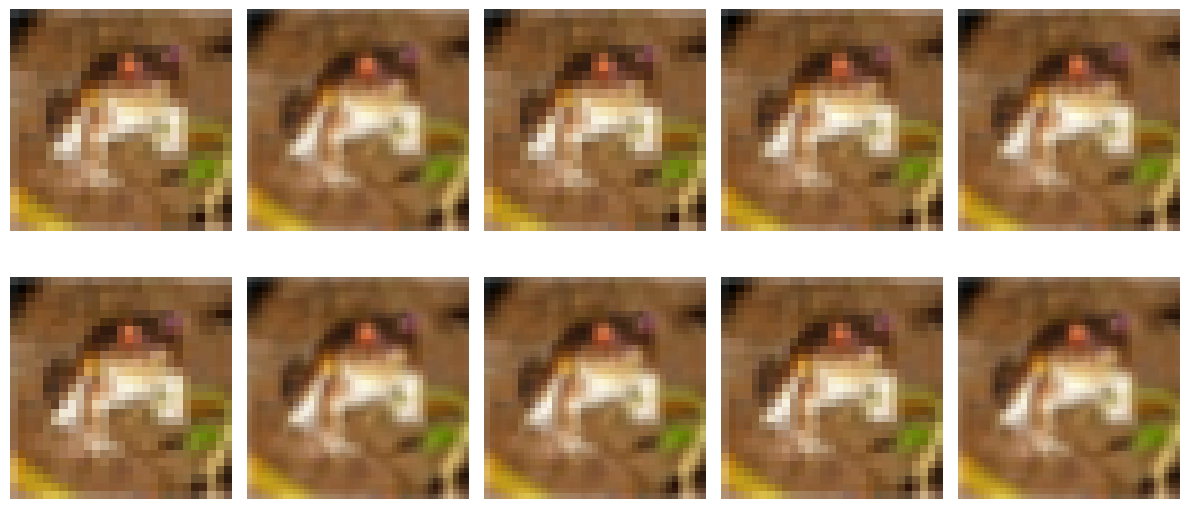

In [8]:
transform = A.Compose([
    A.RandomScale(scale_limit=0.4, p=1.0),
])
visualize_augmentations(dm.data_train.dataset.datasets[0].data[0], transform)

### Perspective

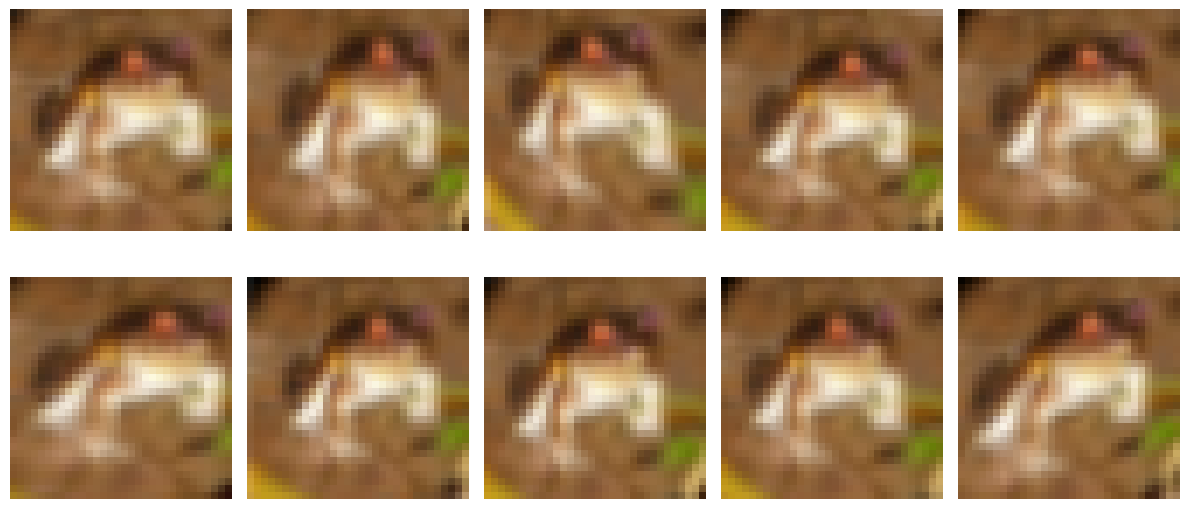

In [9]:
transform = A.Compose([
    A.Perspective(scale=(0.05, 0.1), p=1.),
])
visualize_augmentations(dm.data_train.dataset.datasets[0].data[0], transform)

## Blur

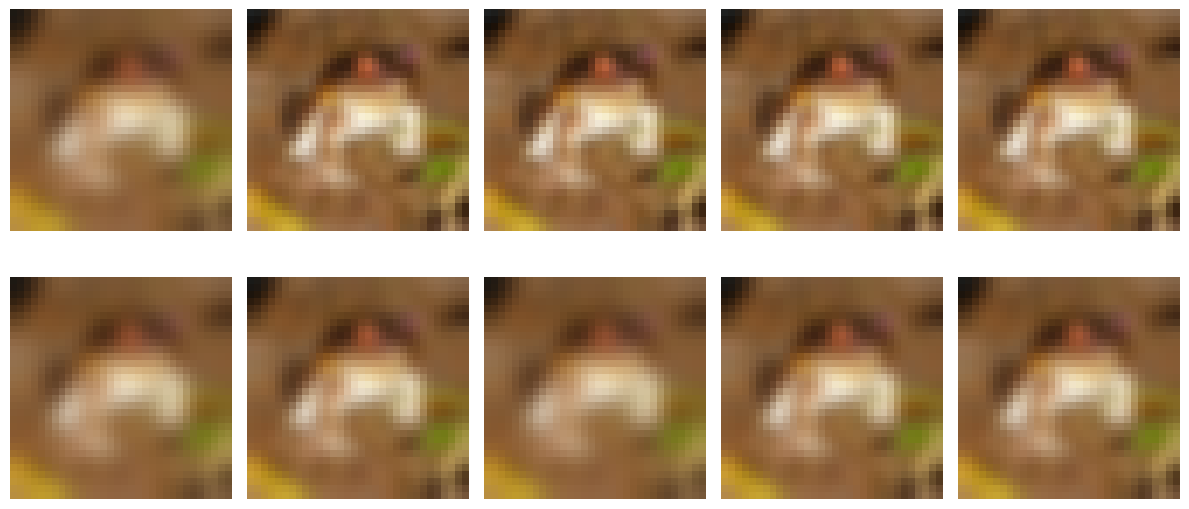

In [10]:
transform = A.Compose([
    A.GaussianBlur(blur_limit=(3,7), p=1.),
])
visualize_augmentations(dm.data_train.dataset.datasets[0].data[0], transform)